# Exercises Hand-In 4 ch3 e9
## Group 30 (Oliver Nilsson)

In [1]:
# Import required libraries
import pandas as pd
import numpy as np
from ISLP import load_data
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt

# Print the versions of the libraries to check if they are installed correctly
print(f"Pandas version: {pd.__version__}")
print(f"Numpy version: {np.__version__}")
print(f"Seaborn version: {sns.__version__}")
print(f"Statsmodels version: {sm.__version__}")
print(f"Matplotlib version: {plt.matplotlib.__version__}")

Pandas version: 1.5.3
Numpy version: 1.24.4
Seaborn version: 0.13.2
Statsmodels version: 0.14.2
Matplotlib version: 3.8.4


In [2]:
# Import the data

df_auto = load_data("Auto")

# After studying the data set, we can see that ? is used to represent missing values
# Replace ? with NaN
df_auto = df_auto.replace('?', np.nan)
# Drop rows with missing values
df_auto = df_auto.dropna()
# Upper case all column names
df_auto.columns = df_auto.columns.str.upper()
# Display the first 5 rows of the data set
df_auto.head()

,MPG,CYLINDERS,DISPLACEMENT,HORSEPOWER,WEIGHT,ACCELERATION,YEAR,ORIGIN,NAME
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


### a) Produce a scatterplot matrix which includes all of the variables in the data set

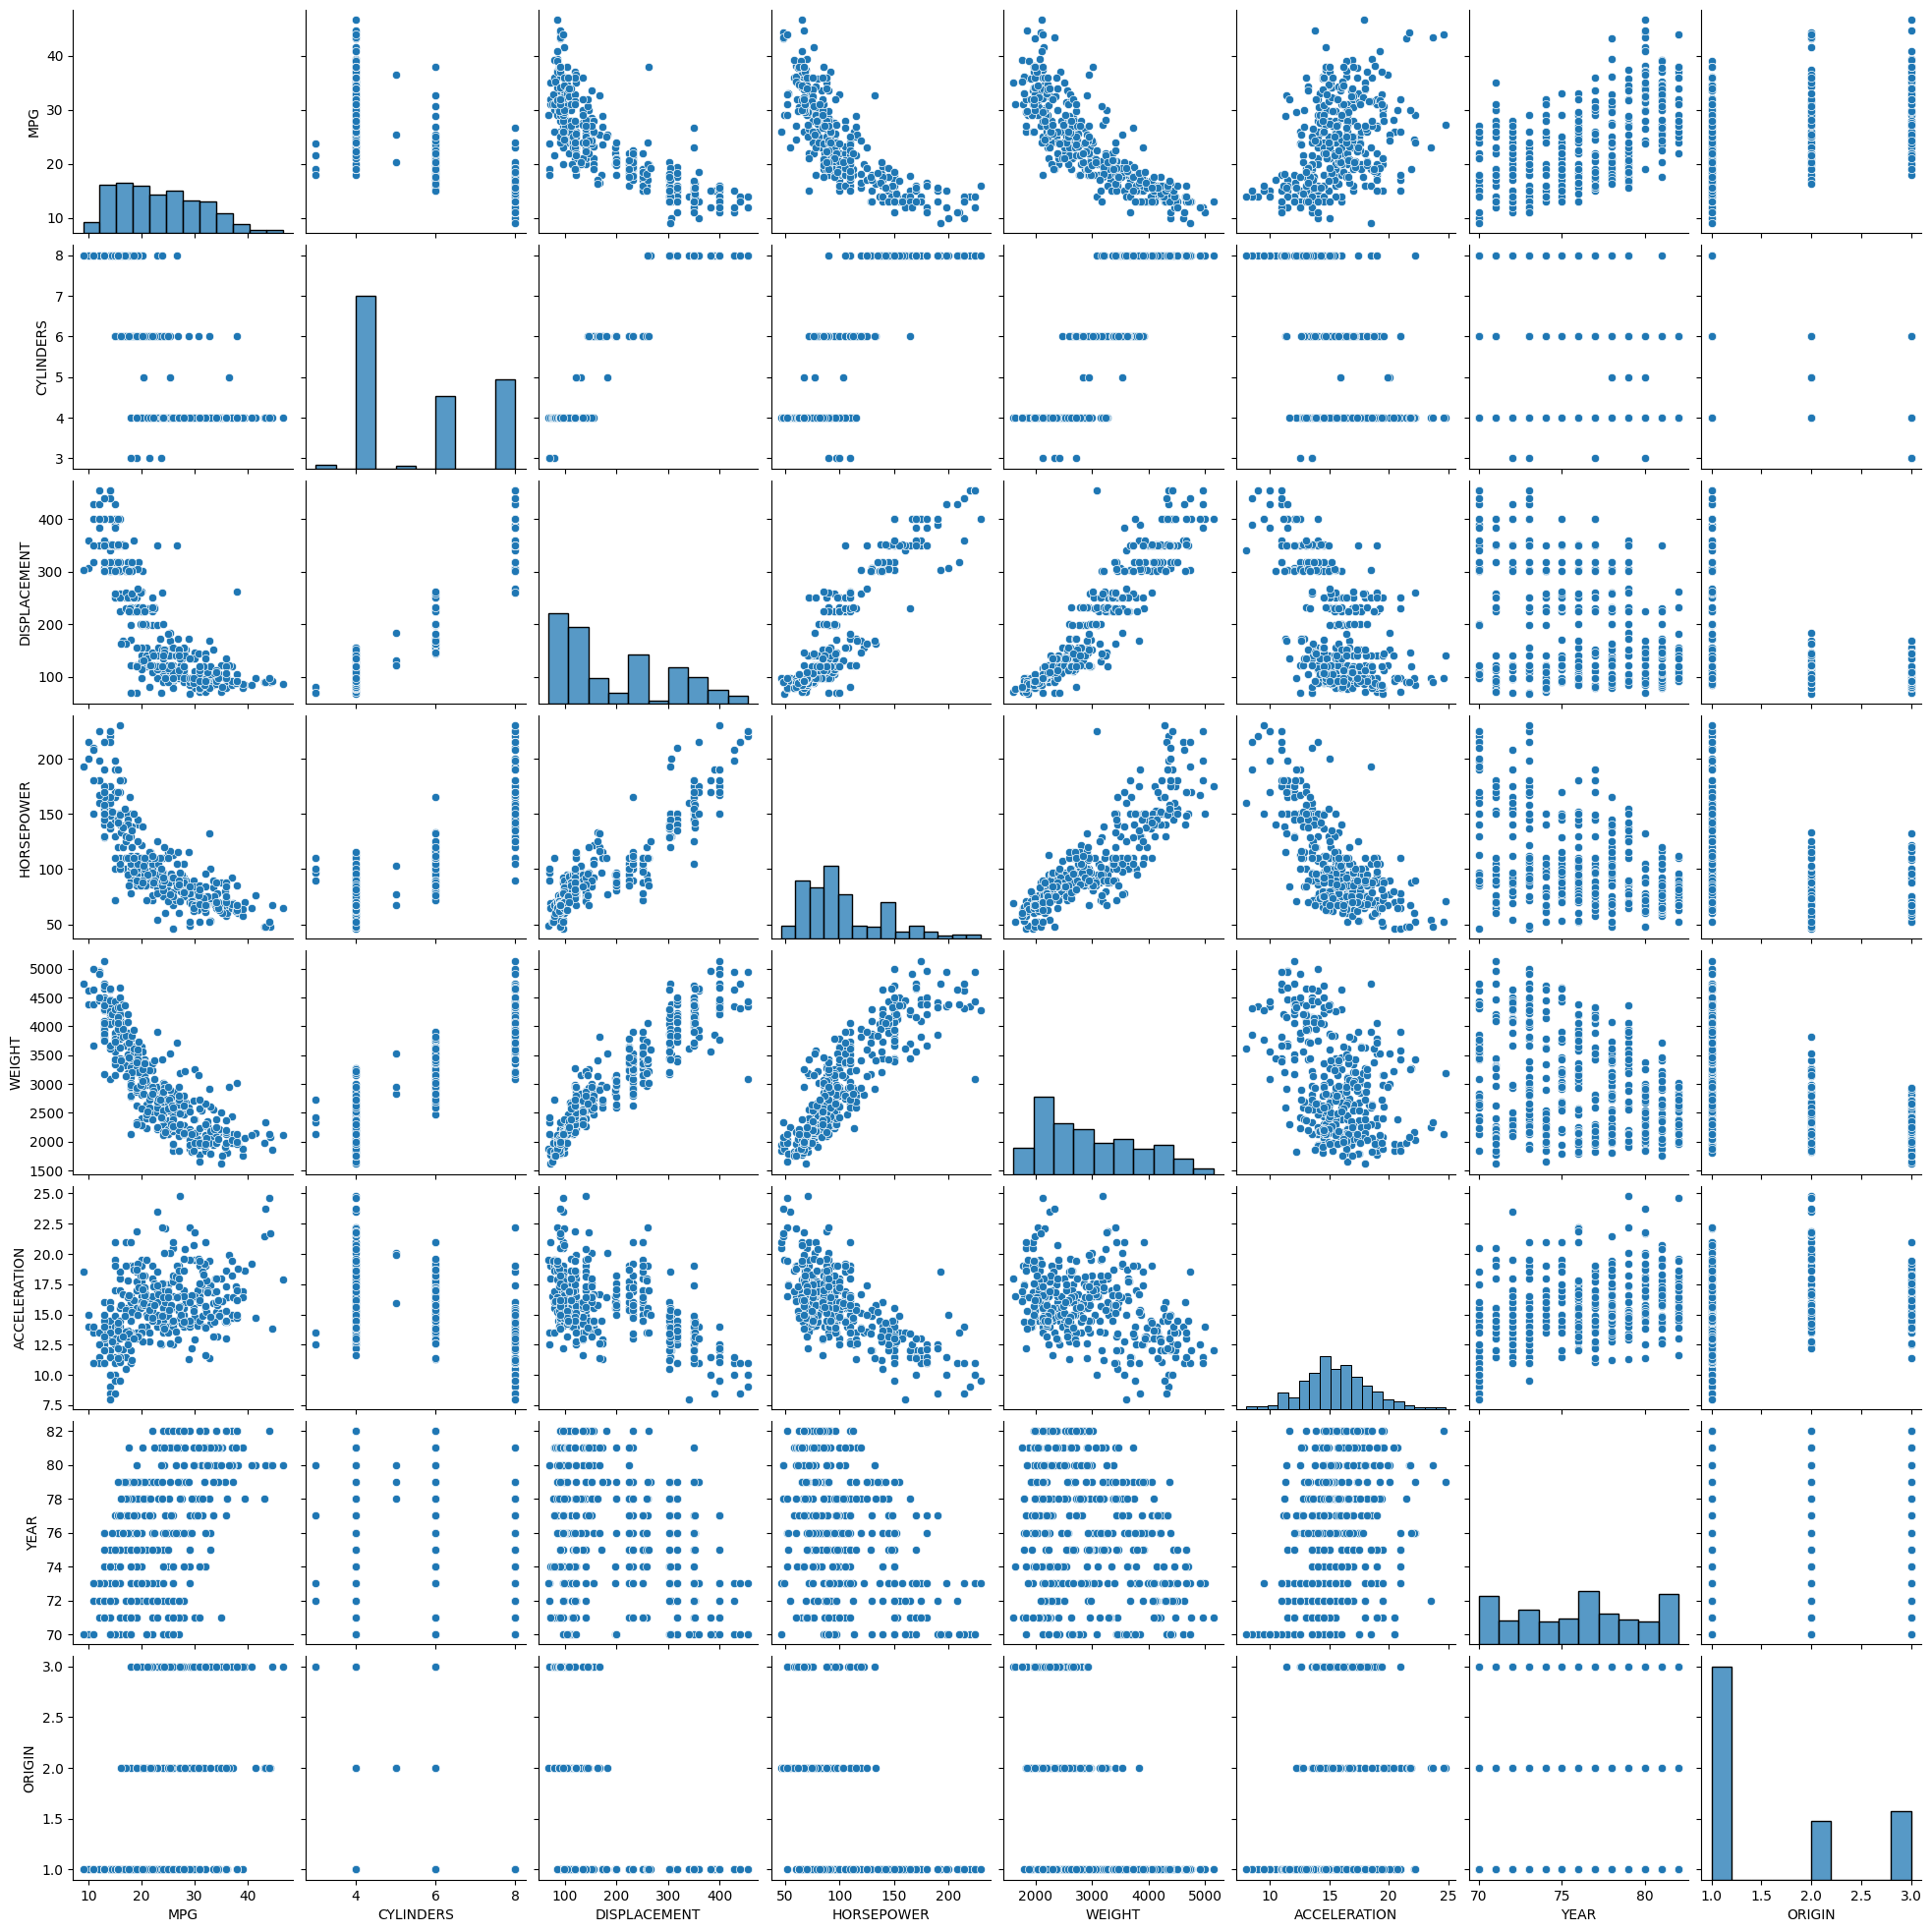

In [3]:
# Create a scatter plot matrix of the data (pairplot)
sns.pairplot(df_auto)

### b) Compute the matrix of correlations between the variables using the DataFrame.corr() method

In [4]:
# Compute the matrix of correlations between the variables
auto_corr_matrix = df_auto.corr(numeric_only=True)

# Display the correlation matrix
auto_corr_matrix

,MPG,CYLINDERS,DISPLACEMENT,HORSEPOWER,WEIGHT,ACCELERATION,YEAR,ORIGIN
MPG,1.000000,-0.777618,-0.805127,-0.778427,-0.832244,0.423329,0.580541,0.565209
CYLINDERS,-0.777618,1.000000,0.950823,0.842983,0.897527,-0.504683,-0.345647,-0.568932
DISPLACEMENT,-0.805127,0.950823,1.000000,0.897257,0.932994,-0.543800,-0.369855,-0.614535
HORSEPOWER,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361,-0.455171
WEIGHT,-0.832244,0.897527,0.932994,0.864538,1.000000,-0.416839,-0.309120,-0.585005
ACCELERATION,0.423329,-0.504683,-0.543800,-0.689196,-0.416839,1.000000,0.290316,0.212746
YEAR,0.580541,-0.345647,-0.369855,-0.416361,-0.309120,0.290316,1.000000,0.181528
ORIGIN,0.565209,-0.568932,-0.614535,-0.455171,-0.585005,0.212746,0.181528,1.000000


### c) Use the sm.OLS() function to perform a multiple linear regression with mpg as the response and all other variables except name as the predictors. Use the summarize() function to print the results.

In [5]:
# Use the sm.OLS() function to perform a multiple linear regression with mpg as the response and all other variables except name as the predictors. Use the summarize() function to print the results.
formula = 'MPG ~ ' + ' + '.join([col for col in df_auto.columns if col not in ['NAME', 'MPG']])
model = smf.ols(formula, data=df_auto).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    MPG   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     252.4
Date:                Mon, 27 May 2024   Prob (F-statistic):          2.04e-139
Time:                        23:36:38   Log-Likelihood:                -1023.5
No. Observations:                 392   AIC:                             2063.
Df Residuals:                     384   BIC:                             2095.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept      -17.2184      4.644     -3.707   

In [6]:
# Filter out the interactions that are not statistically significant using 5% significance level
print(f"Interactions that are statistically significant at 5% significance level:\n{model.pvalues[model.pvalues < 0.05].sort_values()}")

Interactions that are statistically significant at 5% significance level:
YEAR            3.055983e-39
WEIGHT          7.874953e-21
ORIGIN          4.665681e-07
Intercept       2.401841e-04
DISPLACEMENT    8.444649e-03
dtype: float64


**i. Is there a relationship between the predictors and the response? Use the anova_lm() function from statsmodels to answer this question.**

Yes, there is a relationship between the predictors and the response. This conclusion is based on the test of the null hypothesis that all regression coefficients are zero. The F-statistic is significantly different from 1 with a very small p-value, indicating strong evidence against the null hypothesis and suggesting that the predictors collectively have a significant impact on the response.

In [7]:
# Perform an analysis of variance (ANOVA) test to determine the significance of the model
anova_table = sm.stats.anova_lm(model, typ=2)

# Display the ANOVA table
anova_table

,sum_sq,df,F,PR(>F)
CYLINDERS,25.791491,1.0,2.329125,1.277965e-01
DISPLACEMENT,77.612668,1.0,7.008884,8.444649e-03
HORSEPOWER,16.739754,1.0,1.511699,2.196328e-01
WEIGHT,1091.631693,1.0,98.580813,7.874953e-21
ACCELERATION,7.358417,1.0,0.664509,4.154780e-01
YEAR,2402.249906,1.0,216.937408,3.055983e-39
ORIGIN,291.134494,1.0,26.291171,4.665681e-07
Residual,4252.212530,384.0,NaN,NaN


**ii. Which predictors appear to have a statistically significant relationship to the response?**

Analyzing individual predictors, we find:

- **CYLINDERS**: p-value = 0.128, which is greater than 0.05, indicating no significant relationship with the response.
- **DISPLACEMENT**: p-value = 0.00844, which is less than 0.05, indicating a significant relationship with the response.
- **HORSEPOWER**: p-value = 0.22, which is greater than 0.05, indicating no significant relationship with the response.
- **WEIGHT**: p-value is extremely small (7.87e-21), indicating a very significant relationship with the response.
- **ACCELERATION**: p-value = 0.415, which is greater than 0.05, indicating no significant relationship with the response.
- **YEAR**: p-value is extremely small (3.06e-39), indicating a very significant relationship with the response.
- **ORIGIN**: p-value is extremely small (4.67e-07), indicating a very significant relationship with the response.

In summary, DISPLACEMENT, WEIGHT, YEAR, and ORIGIN have statistically significant relationships with the response variable, while CYLINDERS, HORSEPOWER, and ACCELERATION do not show significant relationships at the 0.05 significance level.

**iii. What does the coefficient for the year variable suggest?**

The coefficient of 0.7508 for YEAR suggests that, on average, for each additional year, the miles per gallon (mpg) increases by 0.7508 units, holding all other variables constant. Therefore, newer cars tend to have better fuel efficiency, as they can travel more miles per gallon.

### d) Produce some of diagnostic plots of the linear regression fit as described in the lab. Comment on any problems you see with the fit. Do the residual plots suggest any unusually large outliers? Does the leverage plot identify any observations with unusually high leverage?

In [8]:
# Create a function to plot the diagnostic plots
def diagnostic_plots(model):
    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    # Residuals vs Fitted plot
    sns.residplot(x=model.fittedvalues, y=model.resid, lowess=True, line_kws={'color': 'red'}, scatter_kws={'alpha': 0.5}, ax=axs[0][0])
    axs[0][0].set_xlabel('Fitted values')
    axs[0][0].set_ylabel('Residuals')
    axs[0][0].set_title('Residuals vs Fitted')

    # Normal Q-Q plot
    sm.qqplot(model.resid, line='r', ax=axs[0][1])
    axs[0][1].set_title('Normal Q-Q')

    # Scale-Location plot
    sns.residplot(x=model.fittedvalues, y=np.sqrt(np.abs(model.get_influence().resid_studentized_internal)), lowess=True, line_kws={'color': 'red'}, scatter_kws={'alpha': 0.5}, ax=axs[1][0])
    axs[1][0].set_xlabel('Fitted values')
    axs[1][0].set_ylabel('sqrt(Standardized Residuals)')
    axs[1][0].set_title('Scale-Location')

    # Externally studentized residuals vs Leverage plot
    influence = model.get_influence()
    leverage = influence.hat_matrix_diag
    stand_resids = influence.resid_studentized_internal
    sns.scatterplot(x=leverage, y=stand_resids, ax=axs[1][1])
    axs[1][1].axhline(y=0, color='grey', linestyle='--')
    axs[1][1].set_xlabel('Leverage')
    axs[1][1].set_ylabel('Externally Studentized Residuals')
    axs[1][1].set_title('Externally Studentized Residuals vs Leverage')

    sns.set_style('ticks') # Set the style of the plots
    plt.tight_layout()  # Adjust the layout so plots don't overlap
    plt.show()  # Display the plots

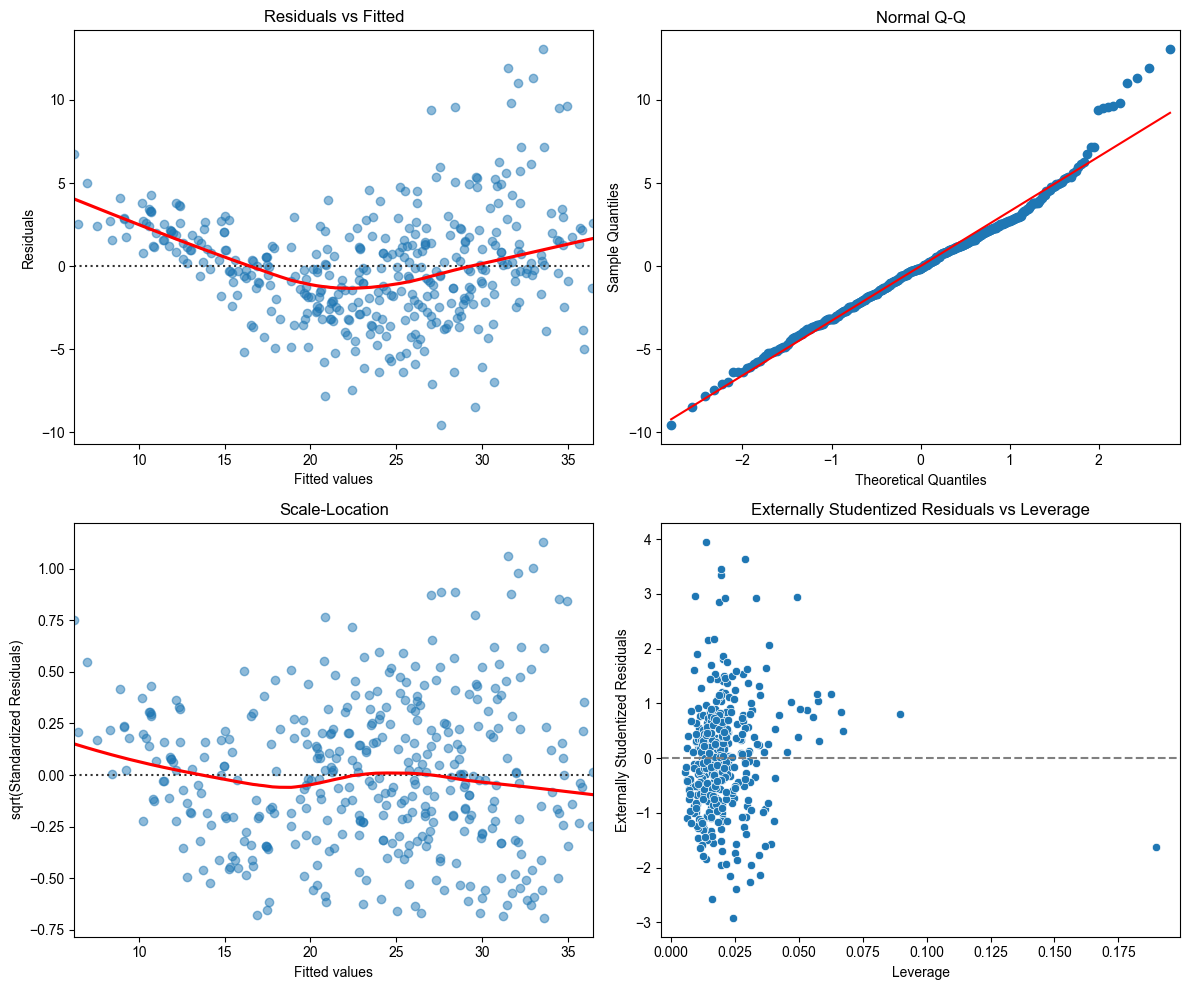

In [9]:
# Plot the diagnostic plots
diagnostic_plots(model)

**Outliers:** In the top-left plot, we see five possible outliers with high predicted responses. The bottom-right plot shows that these outliers don't have a huge impact on our model.

**Leverage:** In the bottom-right plot, there's one data point with high leverage, but it's not an outlier in terms of studentized residuals.

**Linearity:** The top-left residual plot shows a U-shaped pattern, indicating our model isn't capturing a non-linear relationship well. The bottom-left Scale-Location plot suggests that a square-root transform helps fix this non-linearity and improves the fit.

**Heteroscedasticity:** The top-left plot shows a cone-shaped pattern, meaning the residuals' variance increases with the response variable. Using a square-root transform, as shown in the bottom-left plot, helps reduce this effect.

**Normality:** The top-right plot shows a mostly normal distribution, except for some high-value residuals. This means our model underestimates mpg for more observations than expected under a normal distribution.

### e) Fit some models with interactions as described in the lab. Do any interactions appear to be statistically significant?

In [10]:
# Fit a model with all possible interaction effects
formula = 'MPG ~ (' + ' + '.join([col for col in df_auto.columns if col not in ['NAME', 'MPG']]) + ')**2'
model = smf.ols(formula, data=df_auto).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    MPG   R-squared:                       0.889
Model:                            OLS   Adj. R-squared:                  0.881
Method:                 Least Squares   F-statistic:                     104.2
Date:                Mon, 27 May 2024   Prob (F-statistic):          4.01e-155
Time:                        23:36:39   Log-Likelihood:                -929.72
No. Observations:                 392   AIC:                             1917.
Df Residuals:                     363   BIC:                             2033.
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept             

In [11]:
# Filter out the interactions that are not statistically significant using 5% significance level
print(f"Interactions that are statistically significant at 5% significance level:\n{model.pvalues[model.pvalues < 0.05].sort_values()}")

Interactions that are statistically significant at 5% significance level:
ORIGIN                 0.003446
ACCELERATION:ORIGIN    0.003655
ACCELERATION           0.007354
DISPLACEMENT           0.011921
DISPLACEMENT:YEAR      0.013516
ACCELERATION:YEAR      0.030331
dtype: float64


These results show that some combinations of factors have a strong influence on the outcome at the 5% level of confidence:

- The place where a car originates (ORIGIN) has a noticeable impact on the result, with a coefficient of 0.003446.
- When we look at both acceleration (ACCELERATION) and where the car comes from (ORIGIN) together, they also have a significant effect, with a coefficient of 0.003655.
- The speed at which a car accelerates (ACCELERATION), its size (DISPLACEMENT), and how old it is (DISPLACEMENT:YEAR) all individually affect the result significantly, with coefficients of 0.007354, 0.011921, and 0.013516 respectively.
- Also, the combination of acceleration (ACCELERATION) and how old the car is (YEAR) together has an impact, with a coefficient of 0.030331.

These interactions tell us that specific combinations of factors, like where a car comes from or how fast it accelerates, can have a big impact on the outcome we're looking at.

### f) Try a few different transformations of the variables, such as log(X), $\sqrt{X}$, $X^2$. Comment on your findings.

In [12]:
# Try a few different transformations of the variables, such as log(X), sqrt(X), X^2.
# Fit a model with log transformation of the predictors

# Create a new data frame with the transformed variables
df_transformed = df_auto[['MPG', 'WEIGHT', 'HORSEPOWER', 'YEAR']].copy()
df_transformed['WEIGHT_LOG'] = np.log(df_auto['WEIGHT'])
df_transformed['HORSEPOWER_SQRT'] = np.sqrt(df_auto['HORSEPOWER'])
df_transformed['YEAR_SQUARED'] = df_auto['YEAR'] ** 2

# Fit a model with the transformed variables
formula = 'MPG ~ WEIGHT_LOG + HORSEPOWER_SQRT + YEAR_SQUARED'
model = smf.ols(formula, data=df_transformed).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    MPG   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     677.5
Date:                Mon, 27 May 2024   Prob (F-statistic):          8.15e-154
Time:                        23:36:39   Log-Likelihood:                -1002.4
No. Observations:                 392   AIC:                             2013.
Df Residuals:                     388   BIC:                             2029.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         148.9699      7.551     

In [13]:
# Filter out the interactions that are not statistically significant using 5% significance level
print(f"Interactions that are statistically significant at 5% significance level:\n{model.pvalues[model.pvalues < 0.05].sort_values()}")

Interactions that are statistically significant at 5% significance level:
Intercept       1.695110e-60
WEIGHT_LOG      4.194686e-48
YEAR_SQUARED    8.492166e-45
dtype: float64


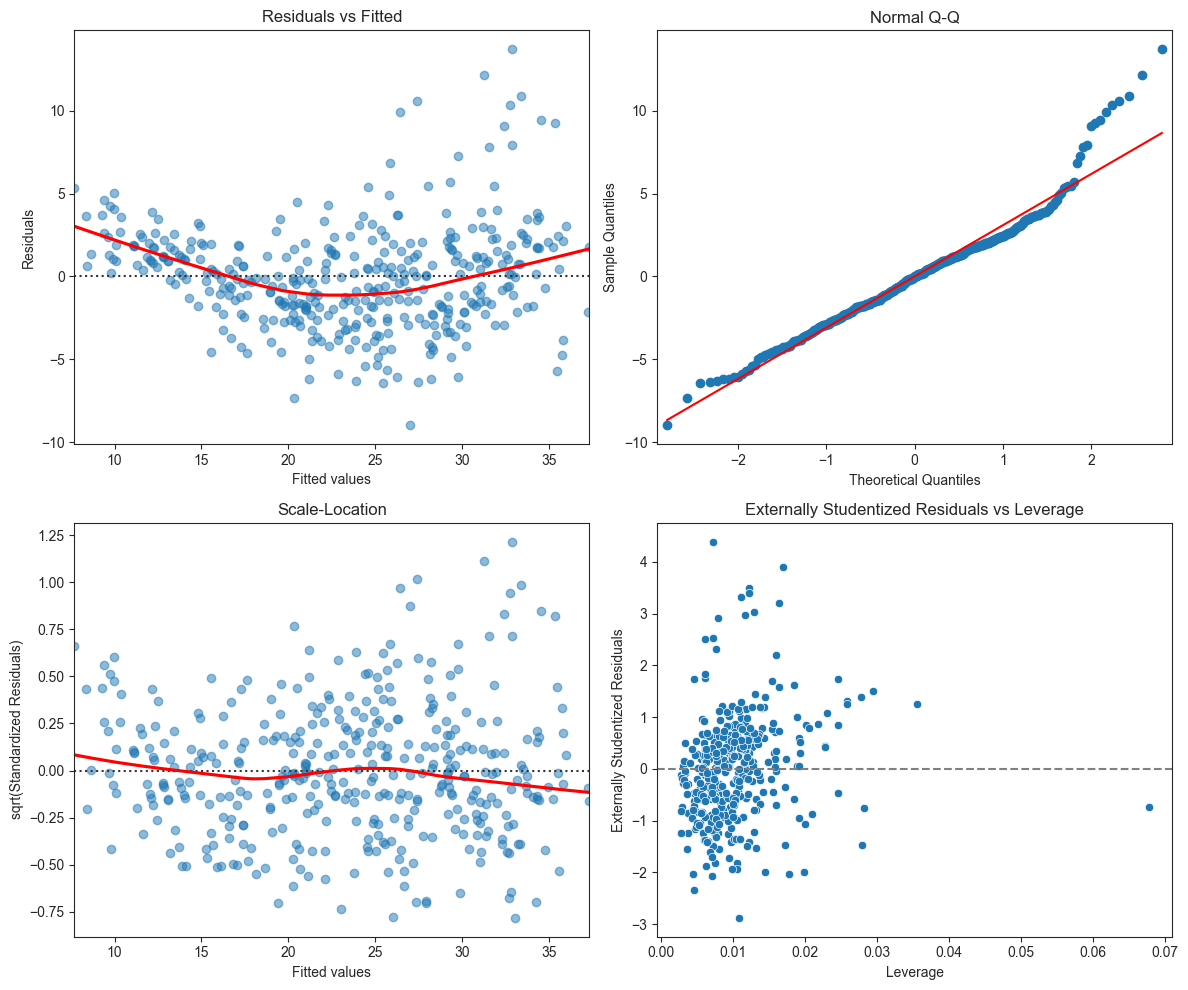

In [14]:
# Print the diagnostic plots
diagnostic_plots(model)

- The top-left residual plots show less of a clear pattern, indicating that transformations like taking the logarithm of weight and square root of horsepower have reduced the non-linearity of the relationship with features, thereby improving our model's fit to the data.
- The bottom-left plot looks like it did before, suggesting no significantly change in homoscedasticity.
- The top-right plot suggests that the model tends to guess too high like before, but now a little bit more.
- There aren't any outliers anymore with really extreme values, but now there are two outliers with lower values than before.